<a href="https://colab.research.google.com/github/Hye-m-in/undergraduate-classes/blob/main/241017_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

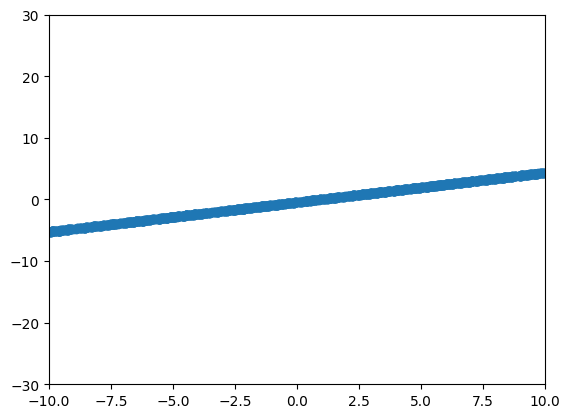

tensor(8.0702)


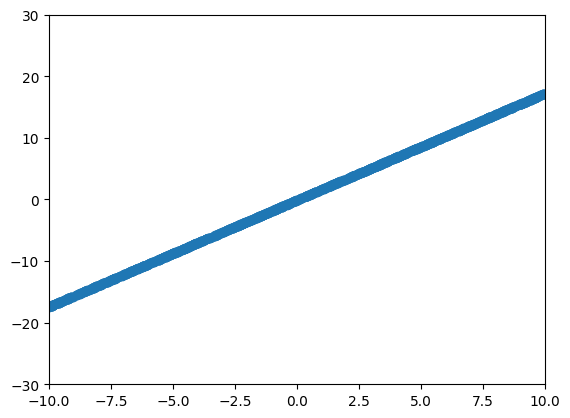

tensor(3.1752)


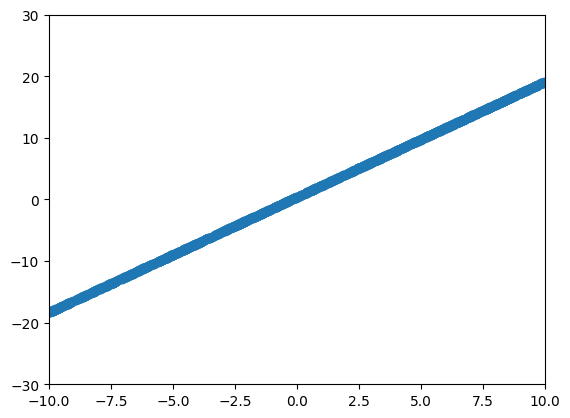

tensor(2.6355)


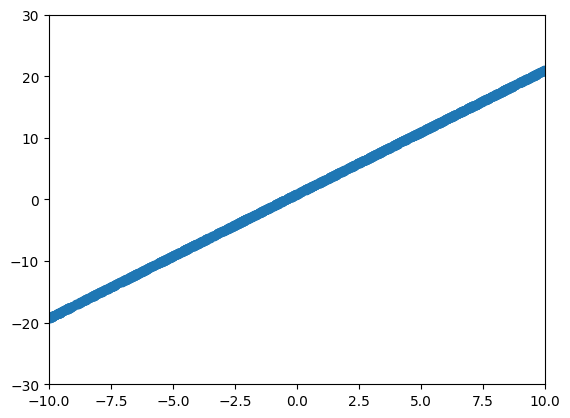

tensor(2.0960)


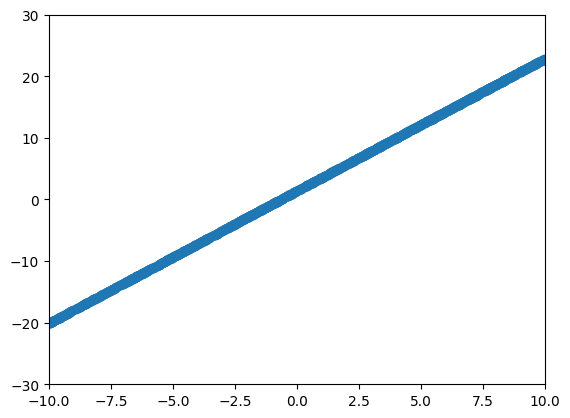

tensor(1.5608)


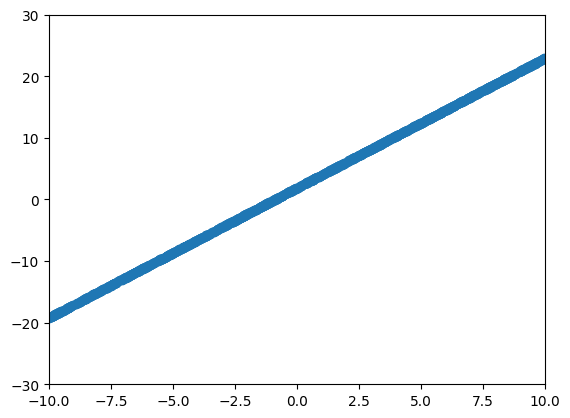

tensor(1.0965)


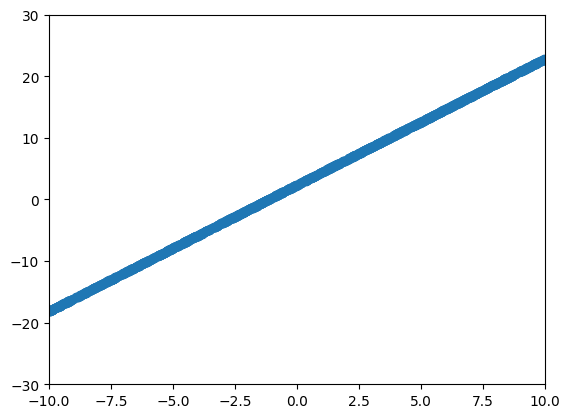

tensor(0.6361)


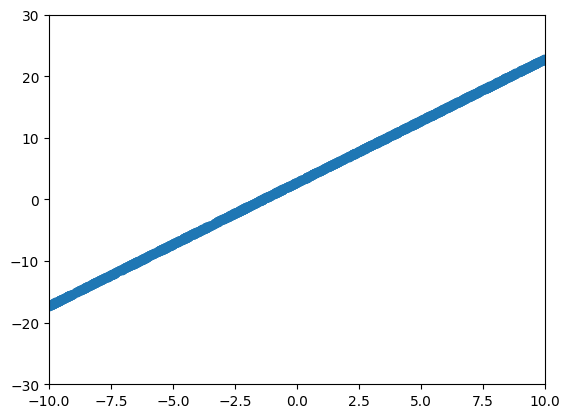

tensor(0.2363)


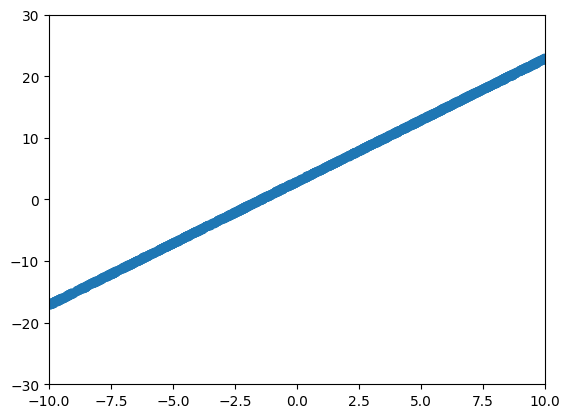

tensor(0.1630)


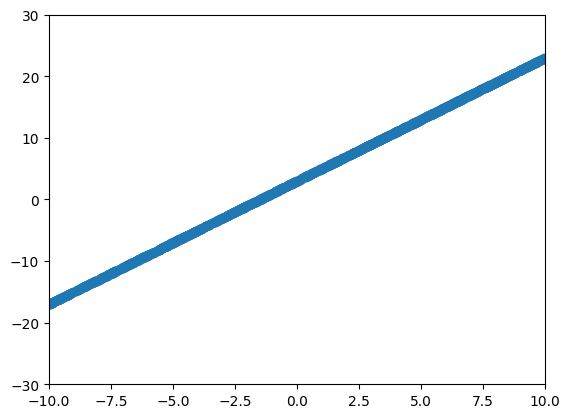

tensor(0.1613)


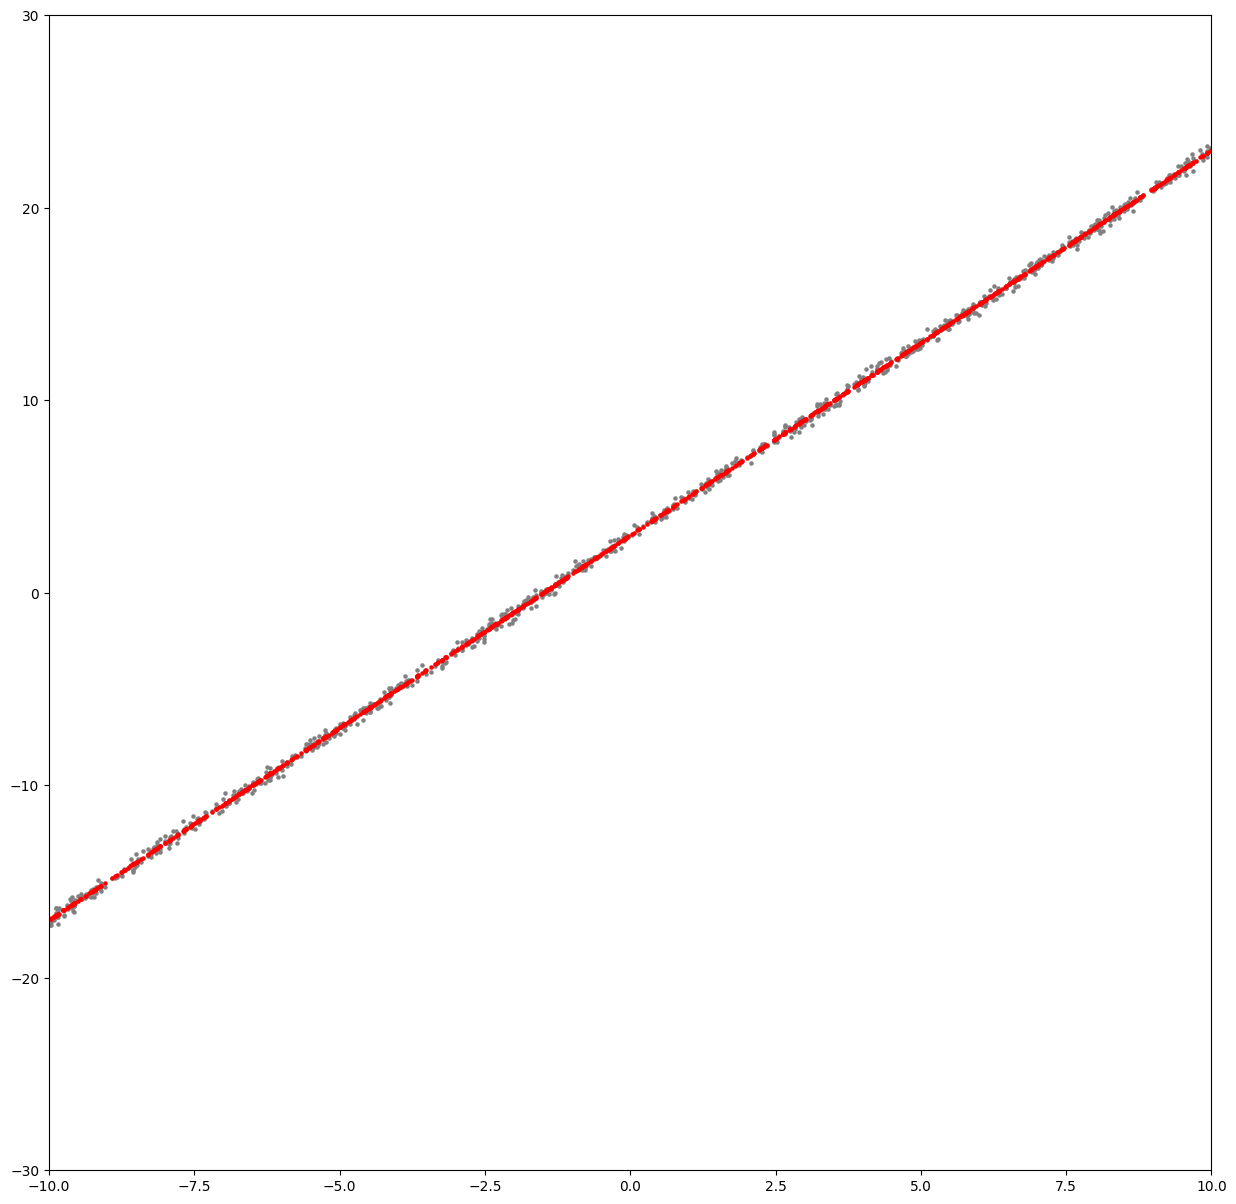

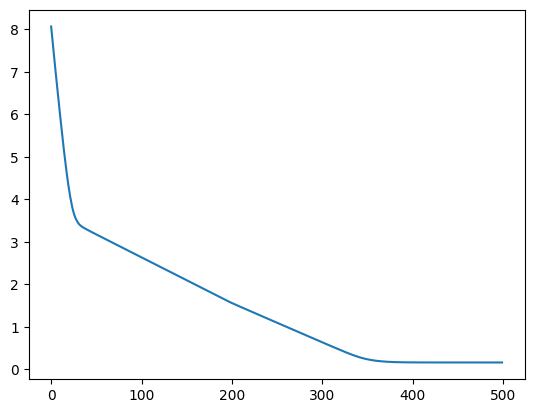

Weigth:  1.9995824098587036 
Bias:  2.9998316764831543


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

num_data = 1000
num_epoch = 500

noise = init.normal_(torch.FloatTensor(num_data,1), std=0.2)

x = init.uniform_(torch.Tensor(num_data,1),-10,10)
y = 2*x+3
y_noise = y + noise

model = nn.Linear(1,1)
loss_func = nn.L1Loss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

loss_arr=[]
label = y_noise

for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()

  if i % 50 == 0:
    plt.scatter(x.detach().numpy(), output.detach().numpy())
    plt.axis([-10, 10, -30, 30])
    plt.show()
    print(loss.data)

  loss_arr.append(loss.detach().numpy())

plt.figure(figsize=(15,15))
plt.scatter(x.numpy(), y_noise.numpy(), s=5, c="gray")
plt.scatter(x.detach().numpy(), output.detach().numpy(), s=5, c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

plt.plot(loss_arr)
plt.show()

param_list = list(model.parameters())
print("Weigth: ",param_list[0].item(), "\nBias: ",param_list[1].item())